## NTS base case

<img src="nts.png" width="600">


## System building and compilation

In [1]:
from pydae.bmapu import bmapu_builder

In [2]:
grid = bmapu_builder.bmapu('nts_base.hjson')
grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('nts')

## Power flow and initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from pydae.bmapu.lines import  change_line
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
from pydae.plot_tools import set_style
colors = set_style(plt)
cmap_boot= LinearSegmentedColormap.from_list("cmap_boot", [colors[0],colors[2]])
import nts

In [4]:
lf = 1
params = {'p_c_1':1350/1500*lf, # generator at bus 1 power reference
          }

model = nts.model()

change_line(model,'2','3',R_pu=0.0,X_pu=0.6,S_mva=100)
model.ini(params,'xy_60.json')
model.save_xy_0('xy_60.json')

S_n_1,S_n_4,p_g_1,p_g_4,q_g_1,q_g_4 = model.get_mvalue(['S_n_1','S_n_4','p_g_1','p_g_4','q_g_1','q_g_4'])
v_f_1,v_f_4 = model.get_mvalue(['v_f_1','v_f_4' ])
V_1,V_2,V_3,V_4 = model.get_mvalue(['V_1','V_2','V_3','V_4' ])

print(f'P_g1 = {p_g_1*S_n_1/1e6:0.0f} MW, P_g4 = {p_g_4*S_n_4/1e6:0.0f} MW')
print(f'Q_g1 = {q_g_1*S_n_1/1e6:0.2f} Mvar, Q_g4 = {q_g_4*S_n_4/1e6:0.2f} Mvar')
print(f'v_f_1 = {v_f_1:0.2f}, v_f_4 = {v_f_4:0.2f}')
print(f'V_1 = {V_1:0.3f}, V_2 = {V_2:0.3f}, V_3 = {V_3:0.3f}, V_4 = {V_4:0.3f}')


P_g1 = 1350 MW, P_g4 = 3900 MW
Q_g1 = 215.69 Mvar, Q_g4 = 489.67 Mvar
v_f_1 = 2.31, v_f_4 = 1.70
V_1 = 1.012, V_2 = 1.000, V_3 = 1.000, V_4 = 1.008


## Small signal analysis

In [5]:
ssa.A_eval(model);
ssa.damp_report(model).round(2).sort_values('Damp')

,Real,Imag,Freq.,Damp,Participation
Mode 24,-0.20,-1.32,0.21,0.15,"[delta_1, omega_1, omega_4]"
Mode 23,-0.20,1.32,0.21,0.15,"[delta_1, omega_1, omega_4]"
Mode 30,-0.14,-0.36,0.06,0.36,"[omega_4, x_5_gov_4]"
Mode 29,-0.14,0.36,0.06,0.36,"[omega_4, x_5_gov_4]"
Mode 18,-2.56,-2.54,0.40,0.71,"[omega_1, e1q_1, x_lpf7_1]"
Mode 17,-2.56,2.54,0.40,0.71,"[omega_1, e1q_1, x_lpf7_1]"
Mode 21,-1.43,1.33,0.21,0.73,[e1q_4]
Mode 22,-1.43,-1.33,0.21,0.73,[e1q_4]
Mode 12,-9.81,4.25,0.68,0.92,[x_lpf7_1]
Mode 13,-9.81,-4.25,0.68,0.92,[x_lpf7_1]


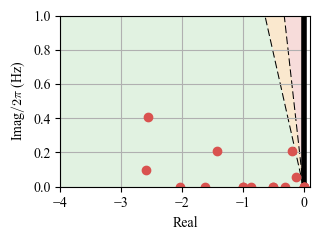

In [6]:
ssa.plot_eig(model.eigvalues, x_min=-4,x_max=0.1,y_min=0,y_max=1);

### Participation factors

In [7]:
ssa.participation(model)['Mode 21'].abs().round(2).sort_values(ascending=False)

e1q_4        1.50
x_cb_4       0.97
omega_4      0.32
e1d_4        0.22
delta_1      0.17
x_lpf7_1     0.13
omega_1      0.13
x_4_gov_4    0.09
e2q_4        0.09
e1q_1        0.06
v_f_4        0.06
delta_4      0.05
x_ll1_1      0.05
x_wo2_1      0.05
x_wo1_1      0.05
x_ll3_1      0.04
x_wo3_1      0.03
xi_v_1       0.02
x_6_gov_4    0.02
x_5_gov_4    0.02
e1d_1        0.02
x_3_gov_4    0.02
e2d_4        0.02
x_gov_1_1    0.00
xi_m_1       0.00
q_z_f_3      0.00
p_z_f_3      0.00
q_z_f_2      0.00
p_z_f_2      0.00
x_9_1_1      0.00
x_9_2_1      0.00
x_9_3_1      0.00
x_9_4_1      0.00
e2q_1        0.00
xi_v_4       0.00
e2d_1        0.00
v_r_4        0.00
x_9_5_1      0.00
x_gov_2_1    0.00
x_a_1        0.00
xi_freq      0.00
Name: Mode 21, dtype: float64

### Mode shapes

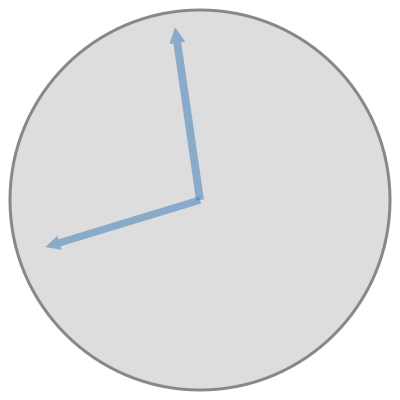

In [8]:
ssa.shape2df(model)
SVG(ssa.plot_shapes(model,mode='Mode 21', states=['omega_1', 'omega_4']))

### Line impedance sweep

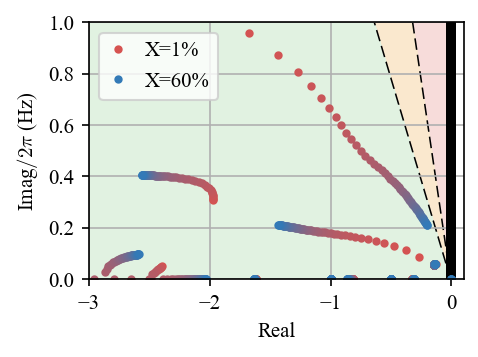

In [9]:
model = nts.model()

for it,X in enumerate(np.arange(0.01,0.61,0.01)):
    
    change_line(model,'2','3',R_pu=0.0,X_pu=X,S_mva=100)
    if it == 0:
        model.ini(params,'xy_0.json')
    else:
        model.ini({})

    ssa.A_eval(model);
    ssa.damp_report(model)

    cmap_value = X/0.6
    if it == 0:
        fig = ssa.plot_eig(model.eigvalues, x_min=-3,x_max=0.1,y_min=0,y_max=1, mark='.',color=cmap_boot(cmap_value));
    else:
        fig = ssa.plot_eig(model.eigvalues, x_min=-3,x_max=0.1,y_min=0,y_max=1,fig=fig, mark='.', color=cmap_boot(cmap_value));

fig.set_dpi(150)

fig.axes[0].lines[5].set_label('X=1%')
fig.axes[0].lines[-1].set_label('X=60%')
fig.axes[0].legend()

## Time domain simulation

In [10]:
model.Dt = 0.01
params.update({})

model.ini(params,'xy_1.json')

model.run( 1.0,{'v_ref_1':1.0})
model.run( 40.0,{'v_ref_1':1.02})

model.post();

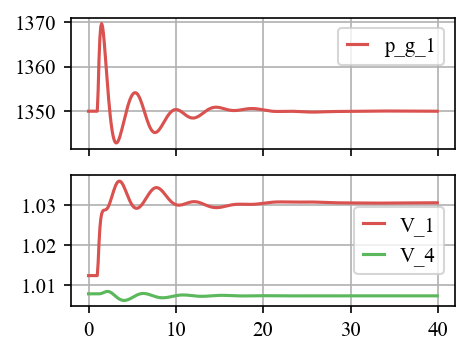

In [11]:
fig,axes = plt.subplots(nrows=2, sharex=True)
axes[0].plot(model.Time,  model.get_values('p_g_1')*model.get_value('S_n_1')/1e6,label='p_g_1')
#axes[0].plot(model.Time,  model.get_values('p_m_1'),label='p_m_1')

axes[1].plot(model.Time,  model.get_values('V_1'),label='V_1')
axes[1].plot(model.Time,  model.get_values('V_4'),label='V_4')

for ax in axes:
    ax.grid()
    ax.legend()

fig.set_dpi(150)

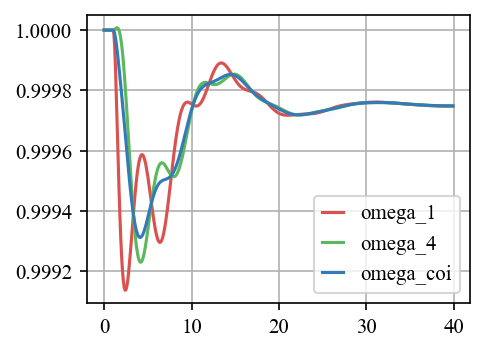

In [12]:
fig,axes = plt.subplots(nrows=1, sharex=True)

axes.plot(model.Time,  model.get_values('omega_1'),label='omega_1')
axes.plot(model.Time,  model.get_values('omega_4'),label='omega_4')
axes.plot(model.Time,  model.get_values('omega_coi'),label='omega_coi')

axes.grid()
axes.legend()
fig.set_dpi(150)